In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

from ch_3_metrics import *

In [2]:
def get_grid_range(X):
    X_min, X_max = X.min(), X.max()
    grid_range = np.linspace(X_min, X_max, 10)
    return grid_range

In [3]:
advertising_data = pd.read_csv('data/advertising.csv', index_col=[0])

In [4]:
X = advertising_data.iloc[:, :-1].to_numpy()
y = advertising_data.loc[:, 'sales'].to_numpy()

In [5]:
# regression on all predictors using statsmodels - detailed
sm_model = sm.OLS(endog=y, exog=sm.add_constant(X))
results = sm_model.fit()

rse, r_squared, f_statistic = get_metrics(results)
print(results.summary().tables[1])
display_metrics(rse, r_squared, f_statistic)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
x1             0.0458      0.001     32.809      0.000       0.043       0.049
x2             0.1885      0.009     21.893      0.000       0.172       0.206
x3            -0.0010      0.006     -0.177      0.860      -0.013       0.011
Residual Standard Error: 1.68551
R Squared: 0.897211
F Statistic: 570.270704



In [6]:
# regression on TV and radio removed newspaper (backwards selection)
X = X[:, :-1] # TV and radio
sm_model = sm.OLS(endog=y, exog=sm.add_constant(X))
results = sm_model.fit()

rse, r_squared, f_statistic = get_metrics(results)
print(results.summary().tables[1])
display_metrics(rse, r_squared, f_statistic)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
x1             0.0458      0.001     32.909      0.000       0.043       0.048
x2             0.1880      0.008     23.382      0.000       0.172       0.204
Residual Standard Error: 1.681361
R Squared: 0.897194
F Statistic: 859.617718



In [7]:
# regression on TV and radio using sklearn - basic
sk_model = LinearRegression()
sk_model.fit(X, y)
print(f'Sklearn Coefficients: {sk_model.coef_}')
print(f'Sklearn Intercept: {sk_model.intercept_}')

Sklearn Coefficients: [0.04575482 0.18799423]
Sklearn Intercept: 2.921099912405138


In [8]:
# create regression plane 
X1_grid_range = get_grid_range(X[:, 0])
X2_grid_range = get_grid_range(X[:, 1])

X1_grid, X2_grid = np.meshgrid(X1_grid_range, X2_grid_range)

X_pred = np.concatenate(
    (X1_grid.reshape(-1, 1), X2_grid.reshape(-1, 1)), 
    axis=1
)

y_pred = sk_model.predict(X_pred)
y_pred = y_pred.reshape(X1_grid.shape)

<IPython.core.display.Javascript object>


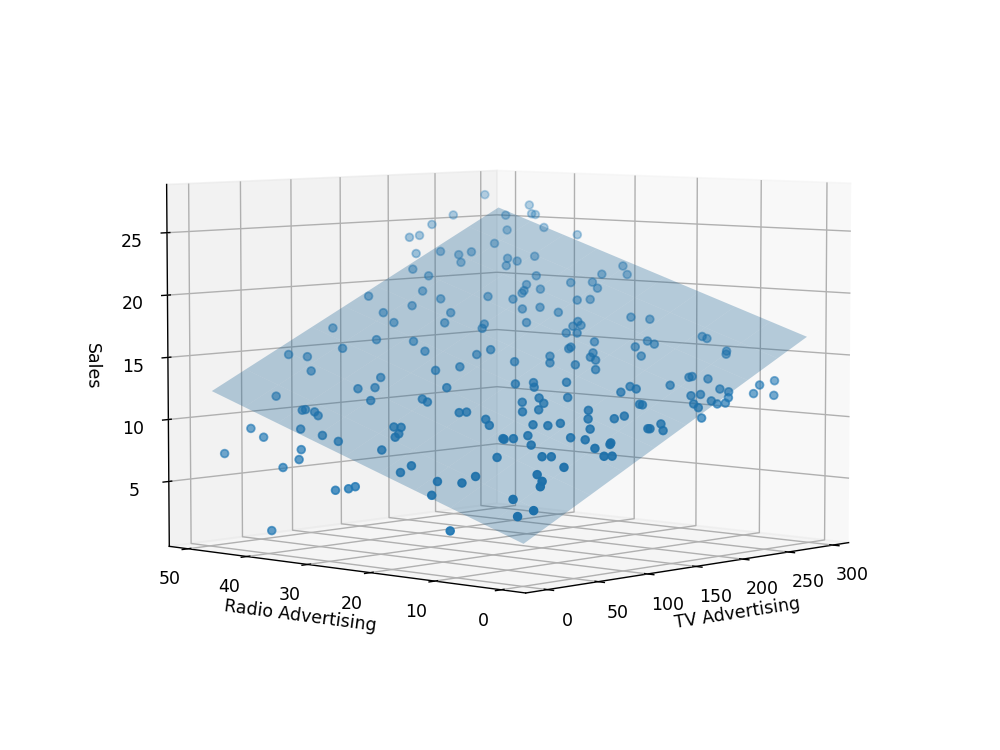

In [9]:
%matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X[:, 0], X[:, 1], y)
ax.plot_surface(
    X1_grid, 
    X2_grid, 
    y_pred, 
    alpha=0.3
)

ax.set_xlabel('TV Advertising')
ax.set_ylabel('Radio Advertising')
ax.set_zlabel('Sales')

plt.show()